In [45]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import string
import os
import sys
import numpy as np
import cmocean.cm as ocm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data')
fig_dir  = os.path.join(proj_dir,'reports','shallow_melting','figures')
int_dir = os.path.join(data_dir,'analysis','interim')

src_dir = os.path.join(proj_dir,'src')
sys.path.append(src_dir)

from visualization.shiftedColorMap import shiftedColorMap

In [17]:
grd_path = os.path.join(data_dir,'preprocessing','processed','waom2_grd.nc')
grd = xr.open_dataset(grd_path)

mask_vostock = (grd.lat_rho<-75) & (grd.lat_rho>-80) & (grd.lon_rho>95) & (grd.lon_rho<115)
grd.mask_rho.values[mask_vostock]=0

m_path = os.path.join(data_dir,'analysis','raw','waom2','ocean_avg_0538-0610_m_avg.nc')
m = xr.open_dataset(m_path).m.isel(ocean_time=0)

temp_path = os.path.join(data_dir,'analysis','raw','waom2','ocean_avg_0538-0610_temp_avg.nc')
temp = xr.open_dataset(temp_path).temp.isel({'ocean_time':0,'s_rho':30})

s2a = 365.25*24*3600

grd['temp'] = temp
grd['m'] = m

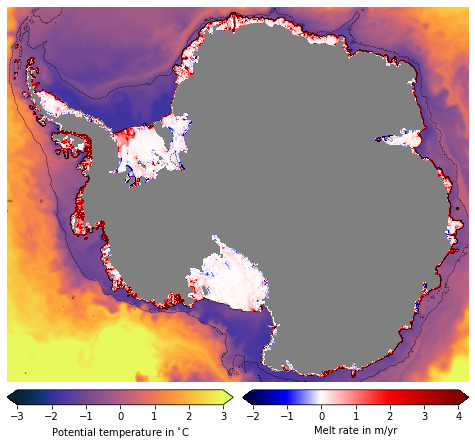

In [18]:
sel = {'xi_rho':slice(132,2900),'eta_rho':slice(250,2500)}
grds = grd.isel(sel)

fig,ax = plt.subplots(figsize=(8.27,8.27))

ax.set_aspect('equal')
ax.axis('off')

temp_range = [-3,3]
m_range = [-2,4]

cmap = matplotlib.colors.ListedColormap(['gray','white'])  
ax.pcolormesh(grds.mask_rho,cmap=cmap)

pm1 = ax.pcolormesh(grds.temp.where(grds.mask_rho),cmap=ocm.thermal,vmin=temp_range[0],vmax=temp_range[1])
cax1 = inset_axes(ax,width="100%",height="4%",loc='lower left',bbox_to_anchor=(0.0, -0.06, 0.49, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
cb1 = plt.colorbar(pm1,cax=cax1,orientation='horizontal',extend='both',
                   label='Potential temperature in $^{\circ}$C')

mask_ice = (grds.mask_rho==1) & (grds.zice<0)
m_min,m_max = m_range
m_cmap = shiftedColorMap(plt.cm.seismic,midpoint = (1 - m_max/(m_max + abs(m_min))))
pm2 = ax.pcolormesh(grds.m.where(mask_ice)*s2a,vmin=m_min,vmax=m_max,cmap=m_cmap)
cax2 = inset_axes(ax,width="100%",height="4%",loc='lower left',bbox_to_anchor=(0.51, -0.06, 0.49, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
cb2 = plt.colorbar(pm2,cax=cax2,orientation='horizontal',extend='both',
                   label='Melt rate in m/yr')

ax.contour(grds.h.where(grds.mask_rho==1), levels=['1500'], colors=('black'),
               linewidths=0.5,linestyles='dashed')
ax.contour(grds.zice.where(grds.mask_rho==1), levels=['-0.1'], colors=('black'),linewidths=0.5,linestyles='solid')
    

#out_path = os.path.join(fig_dir,'melting_bottom_temp.png')
#fig.savefig(out_path,format='png',dpi=400,bbox_inches = "tight")

In [22]:
sel1 = {'xi_rho':slice(714,1243),'eta_rho':slice(1408,1875)} #FRIS
sel2 = {'xi_rho':slice(1185,1726),'eta_rho':slice(652,1146)} #Ross
sel3 = {'xi_rho':slice(380,648),'eta_rho':slice(1114,1780)} #BSeas
sel4 = {'xi_rho':slice(655,924),'eta_rho':slice(720,1244)} #ASeas
sel5 = {'xi_rho':slice(2568,2665),'eta_rho':slice(637,867)} # Totten
sel6 = {'xi_rho':slice(2322,2652),'eta_rho':slice(1650,1781)} # Amery
sel7 = {'xi_rho':slice(1409,1595),'eta_rho':slice(2338,2496)} # Fimbul
sel8 = {'xi_rho':slice(295,534),'eta_rho':slice(1830,2030)} # LarsenC
sel9 = {'xi_rho':slice(390,650),'eta_rho':slice(1500,1775)} # GeorgeV
sel10 = {'xi_rho':slice(550,775),'eta_rho':slice(1000,1250)} # PI
sel11 = {'xi_rho':slice(2550,2750),'eta_rho':slice(650,860)} # Totten
sel12 = {'xi_rho':slice(2330,2640),'eta_rho':slice(1550,1850)} # Amery
sel13 = {'xi_rho':slice(425*5,455*5),'eta_rho':slice(45*5,75*5)} # Mertz
sel14 = {'xi_rho':slice(545*5,595*5),'eta_rho':slice(200*5,250*5)} # Shackleton

sels = {'FRIS':sel1,'Ross':sel2,'GeorgeVI':sel9,'PI':sel10,'Totten':sel11,'Amery':sel12,'Fimbul':sel7,
        'LarsenC':sel8,'Mertz':sel13,'Shackleton':sel14}

In [29]:
def make_ax(ax,sel,m_range,temp_range):
    
    grds=grd.isel(sel)

    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_anchor('SW')

    cmap = matplotlib.colors.ListedColormap(['gray','white'])  
    ax.pcolormesh(grds.mask_rho,cmap=cmap)

    pm1 = ax.pcolormesh(grds.temp.where(grds.mask_rho),cmap=ocm.thermal,vmin=temp_range[0],vmax=temp_range[1])
    cax1 = inset_axes(ax,width="100%",height="4%",loc='lower left',bbox_to_anchor=(0.0, -0.06, 1, 1),
                     bbox_transform=ax.transAxes,borderpad=0)
    cb1 = plt.colorbar(pm1,cax=cax1,orientation='horizontal',extend='both',
                       label='Potential temperature in $^{\circ}$C')

    mask_ice = (grds.mask_rho==1) & (grds.zice<0)
    m_min,m_max = m_range
    m_cmap = shiftedColorMap(plt.cm.seismic,midpoint = (1 - m_max/(m_max + abs(m_min))))
    pm2 = ax.pcolormesh(grds.m.where(mask_ice)*s2a,vmin=m_min,vmax=m_max,cmap=m_cmap)
    cax2 = inset_axes(ax,width="4%",height="100%",loc='lower right',bbox_to_anchor=(0.06, 0.0, 1, 1),
                     bbox_transform=ax.transAxes,borderpad=0)
    cb2 = plt.colorbar(pm2,cax=cax2,extend='both',
                       label='Melt rate in m/yr')

    ax.contour(grds.zice.where(grds.mask_rho==1), levels=['-200'], colors=('black'),linewidths=0.75,linestyles='dashed')
    ax.contour(grds.zice.where(grds.mask_rho==1), levels=['-400'], colors=('black'),linewidths=0.75,linestyles='solid')
    #ax.contour(grds.zice.where(grds.mask_rho==1), levels=['200'], colors=('black'),linewidths=0.5,linestyles='dashed')
    ax.contour(mask_ice, levels=['0.1'], colors=('black'),linewidths=1,linestyles='solid')
    
    return ax

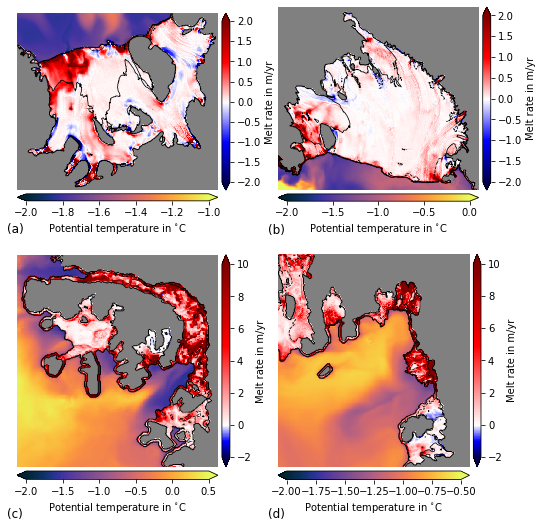

In [46]:
%matplotlib inline
fig = plt.figure(figsize=(8.27,9))

gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1 = make_ax(ax1,sels['FRIS'],[-2,2],[-2,-1.0])

ax2 = fig.add_subplot(gs[0, 1])
ax2 = make_ax(ax2,sels['Ross'],[-2,2],[-2,-0.0])

ax3 = fig.add_subplot(gs[1, 0])
ax3 = make_ax(ax3,sels['GeorgeVI'],[-2,10],[-2,0.5])

ax4 = fig.add_subplot(gs[1, 1])
ax4 = make_ax(ax4,sels['PI'],[-2,10],[-2,-0.5])

plt.subplots_adjust(wspace=0.3,hspace=0.3)

for n,ax in enumerate([ax1,ax2,ax3,ax4]):
    ax.text(-0.05, -0.24, "("+string.ascii_lowercase[n]+")", transform=ax.transAxes, size=12)
    
out_path = os.path.join(fig_dir,'melting_surface_temp_insets1.png')
fig.savefig(out_path,format='png',dpi=300,bbox_inches = "tight")

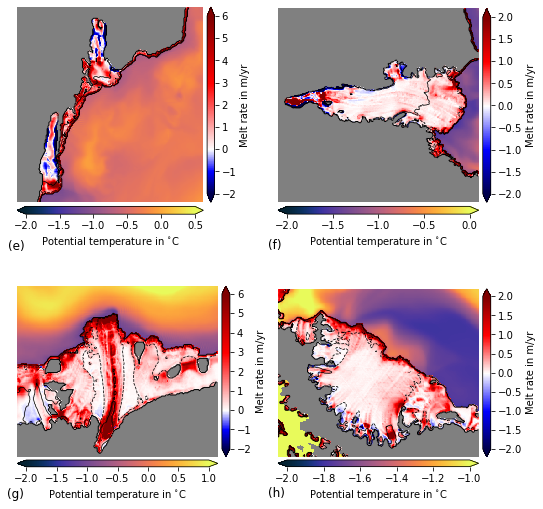

In [47]:
%matplotlib inline
fig = plt.figure(figsize=(8.27,8.27))

gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1 = make_ax(ax1,sels['Totten'],[-2,6],[-2,0.5])

ax2 = fig.add_subplot(gs[0, 1])
ax2 = make_ax(ax2,sels['Amery'],[-2,2],[-2,0.0])

ax3 = fig.add_subplot(gs[1, 0])
ax3 = make_ax(ax3,sels['Fimbul'],[-2,6],[-2,1])

ax4 = fig.add_subplot(gs[1, 1])
ax4 = make_ax(ax4,sels['LarsenC'],[-2,2],[-2,-1.0])

plt.subplots_adjust(wspace=0.3,hspace=0.3)

for n,ax in enumerate([ax1,ax2,ax3,ax4]):
    ax.text(-0.05, -0.24, "("+string.ascii_lowercase[n+4]+")", transform=ax.transAxes, size=12)
    
out_path = os.path.join(fig_dir,'melting_surface_temp_insets2.png')
fig.savefig(out_path,format='png',dpi=300,bbox_inches = "tight")

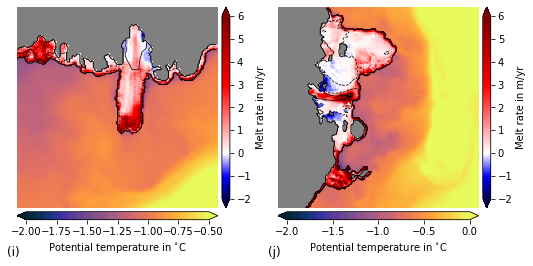

In [48]:
%matplotlib inline
fig = plt.figure(figsize=(8.27,8.27))

gs = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1 = make_ax(ax1,sels['Mertz'],[-2,6],[-2,-0.5])

ax2 = fig.add_subplot(gs[0, 1])
ax2 = make_ax(ax2,sels['Shackleton'],[-2,6],[-2,0.0])

plt.subplots_adjust(wspace=0.3,hspace=0.3)

for n,ax in enumerate([ax1,ax2]):
    ax.text(-0.05, -0.24, "("+string.ascii_lowercase[n+8]+")", transform=ax.transAxes, size=12)
    
out_path = os.path.join(fig_dir,'melting_surface_temp_insets3.png')
fig.savefig(out_path,format='png',dpi=300,bbox_inches = "tight")

/home/ubuntu/bigStick/anaconda3/envs/antarctic_melting/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


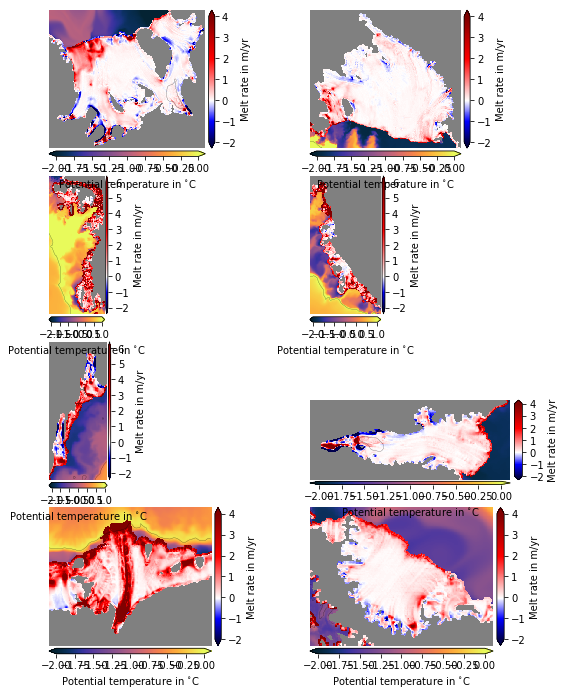

In [93]:
%matplotlib inline
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(8.27,11.69))
plt.subplots_adjust(wspace=0.3)
    
ax1 = make_ax(axes[0,0],sels['FRIS'],[-2,4],[-2,0])
ax2 = make_ax(axes[0,1],sels['Ross'],[-2,4],[-2,0])
ax3 = make_ax(axes[1,0],sels['BSeas'],[-2,6],[-2,1])
ax4 = make_ax(axes[1,1],sels['ASeas'],[-2,6],[-2,1])
ax5 = make_ax(axes[2,0],sels['Totten'],[-2,6],[-2,1])
ax6 = make_ax(axes[2,1],sels['Amery'],[-2,4],[-2,0])
ax7 = make_ax(axes[3,0],sels['Fimbul'],[-2,4],[-2,0])
ax8 = make_ax(axes[3,1],sels['LarsenC'],[-2,4],[-2,0])